# Project information
## Project title: Attrition Analysis of HR Data

### Name: Jyoti Kumar

### Email address associated with your DataCamp account: jyotihajipur@gmail.com

## Project description

Attrition is a big problem for many organizations. Organizations hire people through different sources and train them for the job. When an employee leaves the organization it is a big loss as they have to start the hiring process again. In this project we would analyse a HR dataset to find the attrition percentage by Department and Employee Source. We will calculate the average number of active employees for a period and number of employees left in the period to caclaulte attrition. We would find which Department has highest attrition percentage and which Employee Source contribute more to attrition. Such analysis helps in improving the work culture in the Department with highest attrition and chossing the right source for hiring.

To complete this project, students should be familiar with **dplyr, ggplot2, forcats and basic date functions.** The students should be familiar with dplyr verbs: select, filter, mutate, group_by and summarise. We recommend completing the course of [Introcution to the Tidyverse.](https://www.datacamp.com/courses/introduction-to-the-tidyverse).

The dataset used in this project is taken from [Kaggle](https://www.kaggle.com/rhuebner/human-resources-data-set). The **core_dataset.csv file** is used in the project.

## Project introduction

### 1. Loading the required libraries and the dataset
We will load the **tidyverse** library and the file core_datset.csv

In [1]:
# load the required library
library(tidyverse)

# read the csv file and name it as data
data <- read.csv("core_dataset.csv")

# explore the structure of the data
str(data)

# observe that the date columns DOB, Date.of.Hire and Date.of.Termination have been loaded as factors
# load the files again so strings are not converted to factors by default
data <- read.csv("core_dataset.csv", stringsAsFactors=FALSE)

# check the structure again
str(data)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


'data.frame':	302 obs. of  21 variables:
 $ Employee.Name      : Factor w/ 302 levels "","Adinolfi, Wilson  K",..: 30 154 264 128 251 255 158 223 26 90 ...
 $ Employee.Number    : int  1103024456 1106026572 1302053333 1211050782 1307059817 711007713 1102024115 1206043417 1307060188 1201031308 ...
 $ State              : Factor w/ 29 levels "","AL","AZ","CA",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Zip                : num  1450 1460 2703 2170 2330 ...
 $ DOB                : Factor w/ 299 levels "","1/12/1973",..: 53 145 268 276 166 200 196 60 150 135 ...
 $ Age                : int  32 33 31 32 29 30 33 33 30 38 ...
 $ Sex                : Factor w/ 4 levels "","Female","male",..: 2 4 4 2 2 2 4 4 2 2 ...
 $ MaritalDesc        : Factor w/ 6 levels "","Divorced",..: 3 2 5 3 5 3 3 3 3 3 ...
 $ CitizenDesc        : Factor w/ 4 levels "","Eligible NonCitizen",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Hispanic.Latino    : Factor w/ 5 levels "","no","No","yes",..: 3 3 3 3 3 3 3 3 3 2 ...
 $ RaceDesc   

### 2. Changing the type of DOB, Date.of.Hire and Date.of.Termination to Date
Now we will change the type of the DOB, Date.of.Hire and Date.of.Termination columns to Date. We will specify the format arguement for proper conversion.

In [2]:
# Change the format of DOB column to Date
data$DOB <- as.Date(data$DOB, format = "%m/%d/%Y")

# Change the format of Date.of.Hire column to Date
data$Date.of.Hire <- as.Date(data$Date.of.Hire, format = "%m/%d/%Y")

# Change the format of Date.of.Termination column to Date
data$Date.of.Termination <- as.Date(data$Date.of.Termination, format = "%m/%d/%Y")

# check the structure again
str(data)

'data.frame':	302 obs. of  21 variables:
 $ Employee.Name      : chr  "Brown, Mia" "LaRotonda, William  " "Steans, Tyrone  " "Howard, Estelle" ...
 $ Employee.Number    : int  1103024456 1106026572 1302053333 1211050782 1307059817 711007713 1102024115 1206043417 1307060188 1201031308 ...
 $ State              : chr  "MA" "MA" "MA" "MA" ...
 $ Zip                : num  1450 1460 2703 2170 2330 ...
 $ DOB                : Date, format: "1985-11-24" "1984-04-26" ...
 $ Age                : int  32 33 31 32 29 30 33 33 30 38 ...
 $ Sex                : chr  "Female" "Male" "Male" "Female" ...
 $ MaritalDesc        : chr  "Married" "Divorced" "Single" "Married" ...
 $ CitizenDesc        : chr  "US Citizen" "US Citizen" "US Citizen" "US Citizen" ...
 $ Hispanic.Latino    : chr  "No" "No" "No" "No" ...
 $ RaceDesc           : chr  "Black or African American" "Black or African American" "White" "White" ...
 $ Date.of.Hire       : Date, format: "2008-10-27" "2014-01-06" ...
 $ Date.of.Terminati

### 3. Selecting a few columns from the dataframe required for analysis
Next we will select a few columns required for calculating employee count.

Then we will select a period for analysis and calculate create columns with employee status in the selected dataframe.

In [3]:
# selecting the Employee.Number, Date.of.Hire, Date.of.Termination, Department, Employee.Source columns for analysis
emp_data <- data %>%
    select(Employee.Number, Date.of.Hire, Date.of.Termination, Department, Employee.Source)

# Selecting a period for analysis of attrition in 2015
# Attrition in 2015
start_date <- as.Date("2015-01-01", format = "%Y-%m-%d")
end_date <- as.Date("2015-12-31", format = "%Y-%m-%d")

# using the emp_date dataframe we will now use mutate function to create employee status columns as on start_date and end_date

emp_data_status <- emp_data %>%
    mutate(
            # Employee working status at start date
            # Employee is working at start_date if his Date.of.Termination is > start_date or is NA
            emp_status1 = ifelse(Date.of.Termination> (start_date)
                                | is.na(Date.of.Termination), TRUE, FALSE),

            # Employee active at start date if he/she is hired before start date and is working at start date
            emp_act1 = ifelse(Date.of.Hire <= (start_date) & emp_status1 == TRUE, 1, 0), 

            # Employee working status at end date
            # Employee is working at end_date if his Date.of.Termination is > end_date or is NA
            emp_status2 = ifelse(Date.of.Termination> (end_date)
                                 | is.na(Date.of.Termination), TRUE, FALSE),

            # Employee active at end date if he/she is hired before end date and is working at end date
            emp_act2 = ifelse(Date.of.Hire <= (end_date) & emp_status2 == TRUE, 1, 0),

            # Employee left in the period
            # Employee have left in the selected period if the Date.of.Termination falls between start_date and end_date
            emp_left = ifelse(Date.of.Termination>= (start_date) & 
                                  Date.of.Termination<= (end_date), 1, 0))

# Observe emp_data_status
head(emp_data_status)

Employee.Number,Date.of.Hire,Date.of.Termination,Department,Employee.Source,emp_status1,emp_act1,emp_status2,emp_act2,emp_left
1103024456,2008-10-27,NA,Admin Offices,Diversity Job Fair,TRUE,1,TRUE,1,NA
1106026572,2014-01-06,NA,Admin Offices,Website Banner Ads,TRUE,1,TRUE,1,NA
1302053333,2014-09-29,NA,Admin Offices,Internet Search,TRUE,1,TRUE,1,NA
1211050782,2015-02-16,2015-04-15,Admin Offices,Pay Per Click - Google,TRUE,0,FALSE,0,1
1307059817,2015-05-01,NA,Admin Offices,Website Banner Ads,TRUE,0,TRUE,1,NA
711007713,2011-09-26,2013-09-25,Admin Offices,Diversity Job Fair,FALSE,0,FALSE,0,0


In [4]:
# Calculating attrition by Department
emp_data_Department <- emp_data_status %>%
     group_by(Department) %>%
                summarise(start_c = sum(emp_act1, na.rm = TRUE),
                          end_c = sum(emp_act2, na.rm = TRUE),
                          av_emp = mean(sum(emp_act1, na.rm = TRUE), sum(emp_act2, na.rm = TRUE)),
                          emp_left_in_period = sum(emp_left, na.rm=TRUE),              
                          att_perc = emp_left_in_period/av_emp*100) %>%
               
                arrange(desc(att_perc))

# observe the results
emp_data_Department

Department,start_c,end_c,av_emp,emp_left_in_period,att_perc
Admin Offices,5,6,5,2,40.00000
IT/IS,19,32,19,7,36.84211
Software Engineering,7,6,7,1,14.28571
Production,134,129,134,16,11.94030
Sales,25,26,25,1,4.00000
Executive Office,1,1,1,0,0.00000
Software Engineering,1,1,1,0,0.00000
,0,0,0,0,NaN


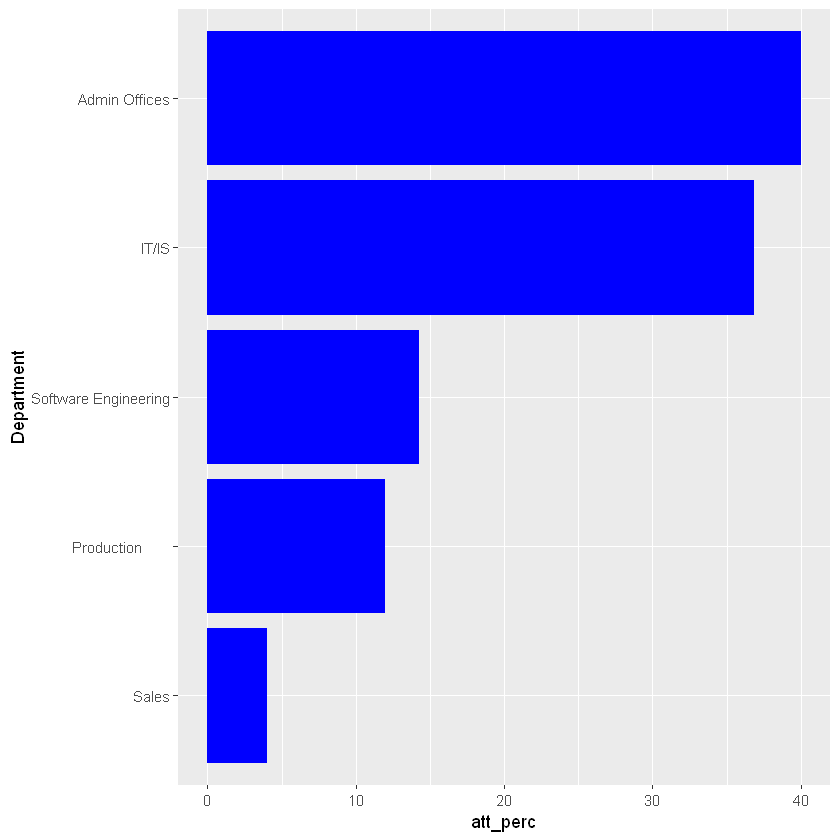

In [5]:
# Plotting bar charts
emp_data_Department <- emp_data_Department %>%
    mutate(Department = as.factor(Department)) %>%
    mutate(Department = fct_reorder(Department, att_perc)) %>%
    filter(att_perc>0)

ggplot(emp_data_Department, aes(x=Department, y=att_perc)) +
    geom_col(fill="blue") +
    coord_flip()

In [6]:
# Calculating attrition by Employee Source
emp_data_EmpSource <- emp_data_status %>%
     group_by(Employee.Source) %>%
                summarise(start_c = sum(emp_act1, na.rm = TRUE),
                          end_c = sum(emp_act2, na.rm = TRUE),
                          av_emp = mean(sum(emp_act1, na.rm = TRUE), sum(emp_act2, na.rm = TRUE)),
                          emp_left_in_period = sum(emp_left, na.rm=TRUE),              
                          att_perc = emp_left_in_period/av_emp*100) %>%
                
                arrange(desc(att_perc))

# observe the results
emp_data_EmpSource

Employee.Source,start_c,end_c,av_emp,emp_left_in_period,att_perc
Diversity Job Fair,18,12,18,7,38.888889
Monster.com,16,14,16,5,31.250000
Search Engine - Google Bing Yahoo,14,10,14,4,28.571429
Vendor Referral,8,9,8,2,25.000000
Other,6,6,6,1,16.666667
Glassdoor,7,10,7,1,14.285714
MBTA ads,15,13,15,2,13.333333
Website Banner Ads,9,11,9,1,11.111111
Employee Referral,19,27,19,2,10.526316
Billboard,11,11,11,1,9.090909


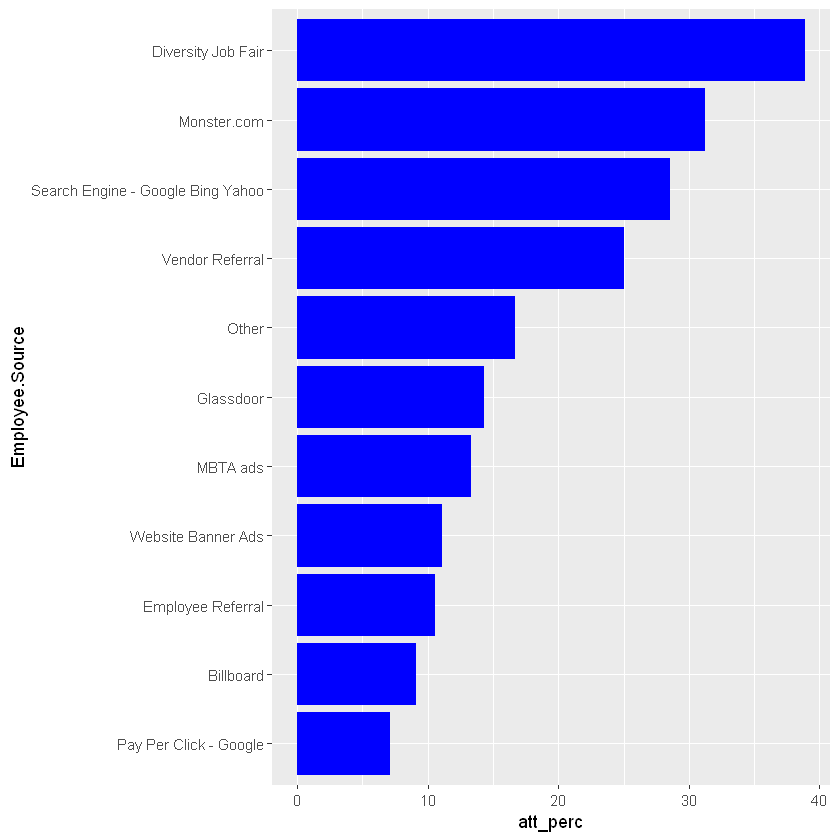

In [7]:
# Plotting bar charts
emp_data_EmpSource <- emp_data_EmpSource %>%
    mutate(Employee.Source = as.factor(Employee.Source)) %>%
    mutate(Employee.Source = fct_reorder(Employee.Source, att_perc)) %>%
    filter(att_perc>0)

ggplot(emp_data_EmpSource, aes(x=Employee.Source, y=att_perc)) +
    geom_col(fill="blue") +
    coord_flip()